<a href="https://colab.research.google.com/github/AnkurMali/IST597_Spring_2022/blob/main/IST597_MLP_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IST597:- Multi-Layer Perceptron Assignment :- pgb5080@psu.edu

## Load the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
np.random.seed(5080*3)
tf.random.set_seed(5080*3)

## Load MNIST Data


In [2]:
# # Load Data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Split Data

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

(X_train, y_train), (X_test, y_test) = fashion_mnist

X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-train_ratio))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((test_ratio/(validation_ratio+test_ratio))))


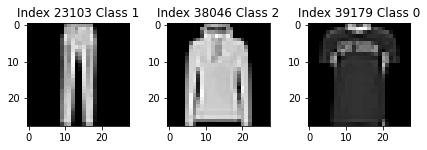

In [4]:
# Display Sample Data

indices = list(np.random.randint(X_train.shape[0],size=3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()

In [5]:
# Print Size
print("X_train Size:" + str(X_train.shape))
print("X_val Size:" + str(X_val.shape))
print("X_test Size:" + str(X_test.shape))

print("y_train Size:" + str(y_train.shape))
print("y_val Size:" + str(y_val.shape))
print("y_test Size:" + str(y_test.shape))

X_train Size:(56000, 28, 28)
X_val Size:(7000, 28, 28)
X_test Size:(7000, 28, 28)
y_train Size:(56000,)
y_val Size:(7000,)
y_test Size:(7000,)


In [6]:
# Reshape Input Data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1]*X_val.shape[2]))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print("X_train Size:" + str(X_train.shape))
print("X_val Size:" + str(X_val.shape))
print("X_test Size:" + str(X_test.shape))

X_train Size:(56000, 784)
X_val Size:(7000, 784)
X_test Size:(7000, 784)


In [7]:
# Rescale data 
X_train=tf.cast(X_train,dtype=tf.float32)
X_val=tf.cast(X_val,dtype=tf.float32)
X_test=tf.cast(X_test,dtype=tf.float32)
X_train=X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [8]:
# Details of input & output data

print("Training input data range: \nFrom " + str(np.min(X_train)) + " to " + str(np.max(X_train)))
print("Validation input data range: \nFrom " + str(np.min(X_val)) + " to " + str(np.max(X_val)))
print("Testing input data range: \nFrom " + str(np.min(X_test)) + " to " + str(np.max(X_test)))

print("\nTraining target data: ")
print(set(list(y_train)))

print("\nValidation target data: ")
print(set(list(y_val)))

print("\nTesting target data: ")
print(set(list(y_test)))

Training input data range: 
From 0.0 to 1.0
Validation input data range: 
From 0.0 to 1.0
Testing input data range: 
From 0.0 to 1.0

Training target data: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Validation target data: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Testing target data: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
# Split Data
size_input = X_train.shape[1] # Input size
Input_layer_size =  X_train.shape[1] # Input size
size_hidden1 = 128 # Hidden neuron in first layer
size_hidden2 = 64 # Hidden neuron in second layer
size_output = 10 # Number of classes (target)

y_train=tf.keras.utils.to_categorical(y_train,size_output)
y_val=tf.keras.utils.to_categorical(y_val,size_output)
y_test=tf.keras.utils.to_categorical(y_test,size_output)

In [10]:
# Print 

print("y_train: ",y_train)
print("y_val: ",y_val)
print("y_test: ",y_test)

y_train:  [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
y_val:  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test:  [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [11]:
# Split dataset into batches
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(16)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(2)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(2)
print("train_ds:",train_ds)
print("train_ds:",val_ds)
print("test_ds:",test_ds)

train_ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>
train_ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>
test_ds: <BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>


## Build MLP using Eager Execution

In [12]:
# Define class to build mlp model
class MLP(object):
  def __init__(self, Input_layer_size, size_input, size_hidden1, size_hidden2, size_output, device=None):
    """
    size_input: int, size of input layer
    size_hidden: int, size of hidden layer
    size_output: int, size of output layer
    device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
    """
    self.size_input, self.Input_layer_size, self.size_hidden1, self.size_hidden2, self.size_output, self.device =\
    size_input, Input_layer_size, size_hidden1, size_hidden2, size_output, device
    
    # Initialize weights for inputs
    self.W1 = tf.Variable(tf.random.normal([self.size_input, self.Input_layer_size]))
    # Initialize biases for hidden layer
    self.b1 = tf.Variable(tf.random.normal([1, self.Input_layer_size]))

    # Initialize weights between input layer and hidden layer 1
    self.W2 = tf.Variable(tf.random.normal([self.Input_layer_size, self.size_hidden1]))
    # Initialize biases for hidden layer
    self.b2 = tf.Variable(tf.random.normal([1, self.size_hidden1]))

    # Initialize weights between hidden layer 1 and hidden layer 2
    self.W3 = tf.Variable(tf.random.normal([self.size_hidden1, self.size_hidden2]))
    # Initialize biases for hidden2 layer
    self.b3 = tf.Variable(tf.random.normal([1, self.size_hidden2]))

     # Initialize weights between hidden layer 2 and output layer
    self.W4 = tf.Variable(tf.random.normal([self.size_hidden2, self.size_output]))
    # Initialize biases for output layer
    self.b4 = tf.Variable(tf.random.normal([1, self.size_output]))
    
    # Define variables to be updated during backpropagation
    self.variables = [self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4]
    
  def forward(self, X):
    """
    forward pass
    X: Tensor, inputs
    """
    if self.device is not None:
      with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
        self.y = self.compute_output(X)
    else:
      self.y = self.compute_output(X)
      
    return self.y
  
  def loss(self, y_pred, y_true):
    '''
    y_pred - Tensor of shape (batch_size, size_output)
    y_true - Tensor of shape (batch_size, size_output)
    '''
    y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
    return tf.losses.categorical_crossentropy(y_true_tf, y_pred_tf)
  
  def backward(self, X_train, y_train):
    """
    backward pass
    """
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
    with tf.GradientTape() as tape:
      predicted = self.forward(X_train)
      reg = (tf.reduce_sum(tf.abs(self.W1)) + tf.reduce_sum(tf.abs(self.W2)) + tf.reduce_sum(tf.abs(self.W3))) # L1 penalty 
      current_loss = self.loss(predicted, y_train) + 0.05*reg
    grads = tape.gradient(current_loss, self.variables)
    optimizer.apply_gradients(zip(grads, self.variables))
        
        
  def compute_output(self, X):
    """
    Custom method to obtain output tensor during forward pass
    """
    # Cast X to float32
    X_tf = tf.cast(X, dtype=tf.float32)
    # Compute values in input
    what1 = tf.matmul(X_tf, self.W1) + self.b1
    hhat1 = tf.nn.relu(what1)
    # Compute values in hidden layer 1
    what2 = tf.matmul(hhat1, self.W2) + self.b2
    hhat2 = tf.nn.relu(what2)
    # Compute values in hidden layer 2
    what3 = tf.matmul(hhat2, self.W3) + self.b3
    hhat3 = tf.nn.relu(what3)
    # Compute output
    output = tf.matmul(hhat3, self.W4) + self.b4
    output = tf.nn.softmax(output)
    return output
  
 # Calculate standard error
  def stderr(self,y_pred):
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
    std_dev = np.std(y_pred_tf) #Calculates standard deviation
    std_err = std_dev/sqrt(len(y_pred_tf))
    return std_err 

 # Calculate variance error
  def var(self,y_pred):
    y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
    std_dev = np.std(y_pred_tf) #Calculates standard deviation
    variance = (std_dev**2) # calculate variance
    return variance     
      

## Train Model:

In [13]:
# Set number of epochs
NUM_EPOCHS = 10

# Initialize model using CPU
mlp_on_cpu = MLP(size_input, Input_layer_size, size_hidden1, size_hidden2, size_output, device='cpu')
time_start = time.time()
for epoch in range(NUM_EPOCHS):
  loss_total = tf.zeros([1,1], dtype=tf.float32)
  lt = 0
  train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(25, seed=epoch*(5080*3)).batch(20)
  for inputs, outputs in train_ds:
    preds = mlp_on_cpu.forward(inputs)
    loss_total = loss_total + mlp_on_cpu.loss(preds, outputs)
    lt = lt + mlp_on_cpu.loss(preds, outputs)
    mlp_on_cpu.backward(inputs, outputs)
  print('Number of Epoch = {} - Average Cross Entropy:= {}'.format(epoch + 1, np.sum(loss_total)/X_train.shape[0]))
time_taken = time.time() - time_start

print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))

Number of Epoch = 1 - Average Cross Entropy:= 14.544175223214285
Number of Epoch = 2 - Average Cross Entropy:= 14.514748883928572
Number of Epoch = 3 - Average Cross Entropy:= 14.515430803571428
Number of Epoch = 4 - Average Cross Entropy:= 13.298802455357142
Number of Epoch = 5 - Average Cross Entropy:= 12.914178571428572
Number of Epoch = 6 - Average Cross Entropy:= 11.56804799107143
Number of Epoch = 7 - Average Cross Entropy:= 7.4097025669642855
Number of Epoch = 8 - Average Cross Entropy:= 1.0629534040178572
Number of Epoch = 9 - Average Cross Entropy:= 1.1211875
Number of Epoch = 10 - Average Cross Entropy:= 1.3178387276785715

Total time taken (in seconds): 744.78


## One Step Inference: Validation





In [14]:
# Initialize
test_loss_total = tf.Variable(0, dtype=tf.float32)
acc_preds = tf.Variable(0,dtype=tf.float32)
acc = tf.Variable(0, dtype=tf.float32)

# Calculate
for inputs, outputs in val_ds:

  preds = mlp_on_cpu.forward(inputs) # Prediction
  test_loss_total = test_loss_total + mlp_on_cpu.loss(preds,outputs) # Loss
  standard_error = mlp_on_cpu.stderr(preds) # Standard error
  Variance = mlp_on_cpu.var(preds) # Variance

  for i in range(preds.shape[0]):
    if tf.argmax(preds[i])==tf.argmax(outputs[i]):
      acc_preds = acc_preds + 1.0
acc = (acc_preds/X_test.shape[0])*100.0
print('Inference 1st')
print('Test MSE: {:.4f}'.format(np.sum(test_loss_total.numpy())/X_train.shape[0]))
print('Accuracy: {:.4f}'.format(acc))
print('Standard Error: {:.4f}'.format(standard_error))
print('Variance: {:.4f}'.format(Variance))

Inference 1st
Test MSE: 0.1724
Accuracy: 47.9429
Standard Error: 0.0929
Variance: 0.0173


## One Step Inference: Testing

In [15]:
# Initialize
test_loss_total = tf.Variable(0, dtype=tf.float32)
acc_preds = tf.Variable(0,dtype=tf.float32)
acc = tf.Variable(0, dtype=tf.float32)

# Calculate
for inputs, outputs in test_ds:

  preds = mlp_on_cpu.forward(inputs) # Prediction
  test_loss_total = test_loss_total + mlp_on_cpu.loss(preds,outputs) # Loss
  standard_error = mlp_on_cpu.stderr(preds) # Standard error
  Variance = mlp_on_cpu.var(preds) # Variance

  for i in range(preds.shape[0]):
    if tf.argmax(preds[i])==tf.argmax(outputs[i]):
      acc_preds = acc_preds + 1.0
acc = (acc_preds/X_test.shape[0])*100.0
print('Inference 1st')
print('Test MSE: {:.4f}'.format(np.sum(test_loss_total.numpy())/X_train.shape[0]))
print('Accuracy: {:.4f}'.format(acc))
print('Standard Error: {:.4f}'.format(standard_error))
print('Variance: {:.4f}'.format(Variance))

Inference 1st
Test MSE: 0.1722
Accuracy: 49.1000
Standard Error: 0.1449
Variance: 0.0420
